# Actividad propuesta

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits import mplot3d
#from hdbscan import HDBSCAN
import os
print(os.getcwd())

c:\Users\Windows\Desktop\Bootcamp-DS-2023-II\Clase 21 y 22 - 13 y 18 Sep 2023


# Weather Station Clustering using DBSCAN & scikit-learn

**Dataset:** Environment Canada Monthly Values Para Todo el año de 2014

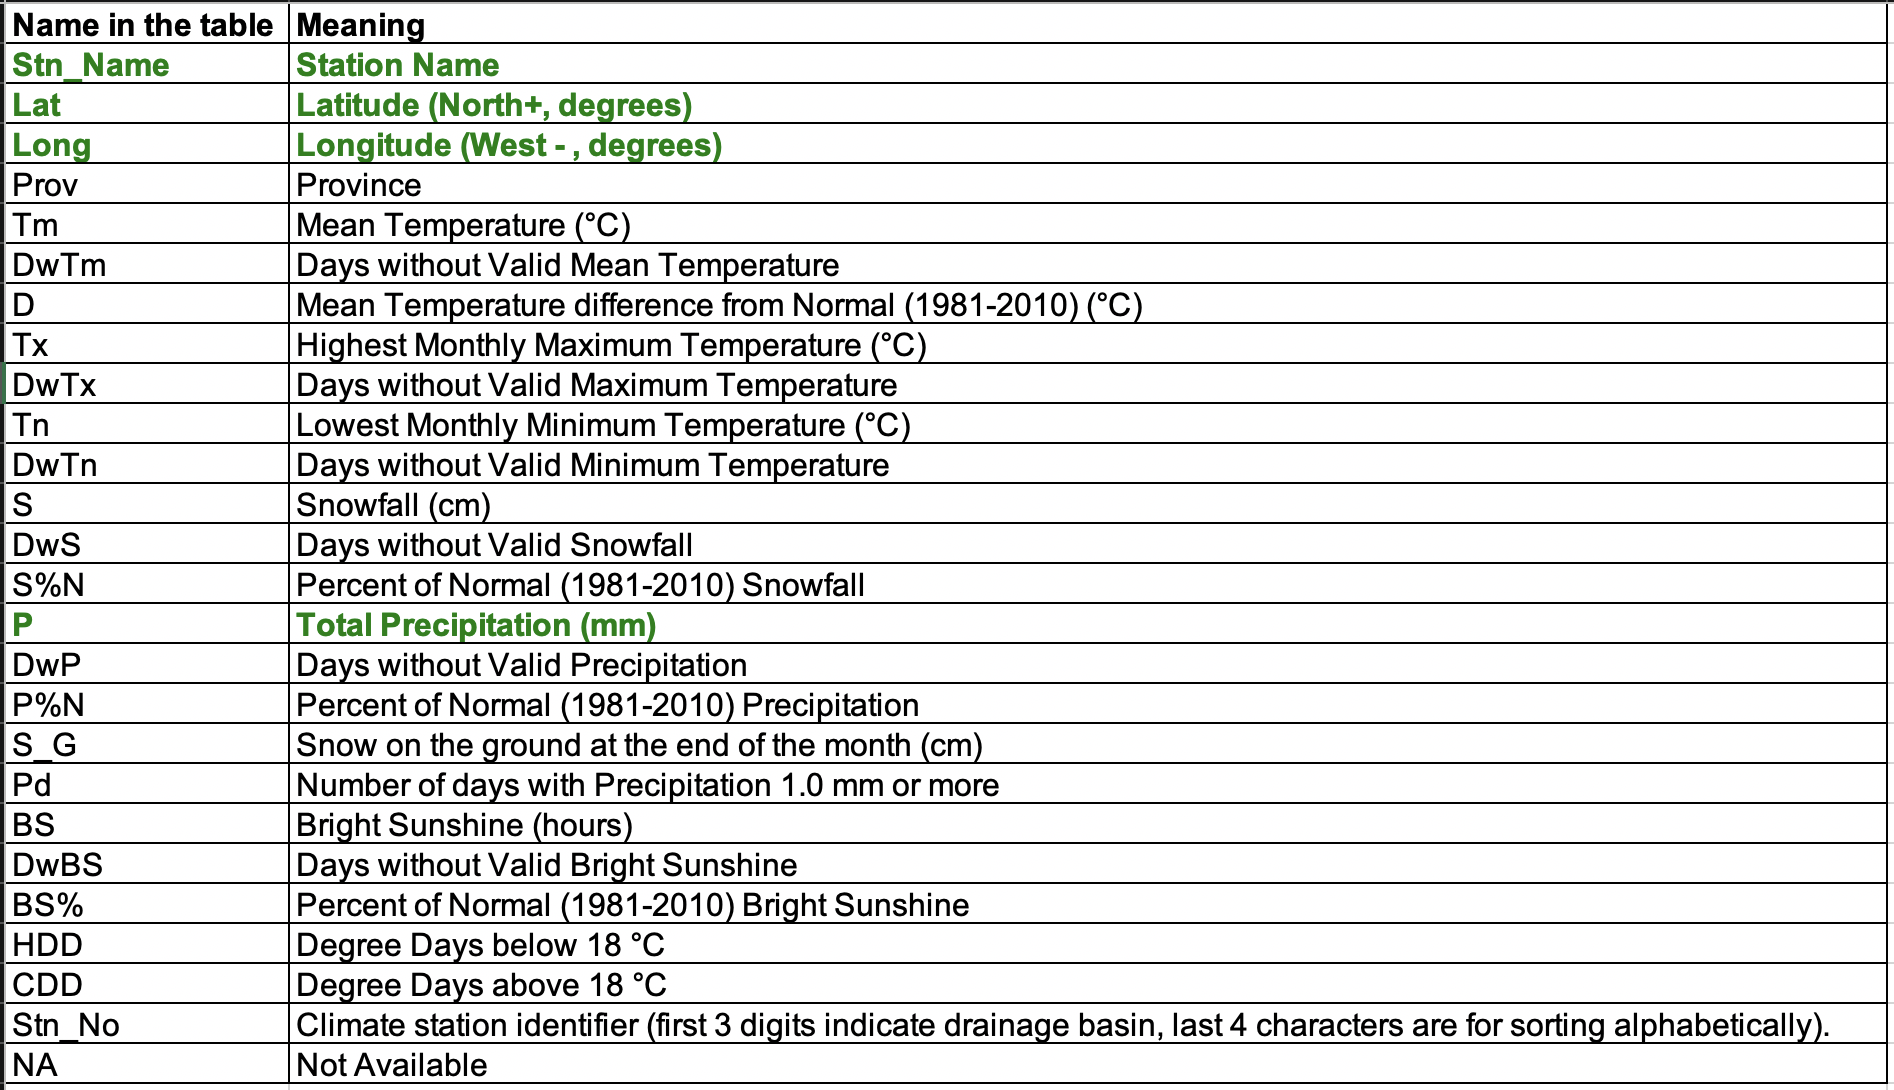

**Contexto de negocio** Usted es un famoso climatologo y lo contratan para que establezca la segmentacion apropiada de zonas en Canada de acuerdo con informacion de la temperatura del mes mas caliente del pais. 

**Contexto analitico** Usted cuenta con una fuente de informacion en donde se tiene informacion climatologica para cerca de 300 estaciones a lo largo del pais, cada estacion cuenta con una provincia y las coordenadas geograficas respectivas en Latx Long. Adicionalmente cuenta con informacion de Temperatura, precipitacion, cantidad de nieve y diversas metricas que se muestran en la imagen anterior.

**Pregunta a resolver** Como desarrollar una clasificacion de zonas a lo largo de Canada por medio de variables asociadas a Temperatura (Tm , Tx, Tn)

# Importar la data

In [2]:
import csv
import pandas as pd
import numpy as np
filename='weather-stations20140101-20141231.csv'
#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

In [3]:
pdf.shape

(1341, 25)

In [4]:
pdf.isnull().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

## Ejercicio 1

Procede a analizar si hay presencia de NAs en la columna Lat, Long, Tm, de encontrar limpie la data omitiendo las filas con esta caracteristica, ya que dificultaran el analisis posterior

In [5]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...  8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  

[5 rows x 25 columns]

In [6]:
pdf.shape

(1256, 25)

## Ejercicio 2

Utilize el paquete **folium** y cree un mapa entre Latitudes (40-65N) y Longitudes(220 y 310º) que correpsonden a la ubicacion de Canada donde se logre evidencias a todas las estaciones a lo largo del paìs. 

***Sugerencia*** Utilice la funcion `folium.CircleMarker` para mostrar a las estaciones 

In [7]:
pdf.shape

(1256, 25)

In [7]:
import folium
#import re
#Stamen Toner
m = folium.Map(location=[pdf.Lat.mean(), pdf.Long.mean()], zoom_start=4, tiles='OpenStreetMap')
for i in range(0,pdf.shape[0]):
    marker = folium.CircleMarker(location=[pdf["Lat"][i],pdf["Long"][i]],radius=1,color="blue",fill=True)
    marker.add_to(m)
m

In [8]:
import folium
import re
#limites
llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]
pdf

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...   DwP    P%N   S_G    Pd  BS  DwBS  BS%     HDD  CDD  \
0      0.0   1.0  ...   0.0    NaN   0.0  12.0 NaN   NaN  NaN   273.3  0.0   
1      0.0  -3.0  ...   0.0  104.0   0.0  12.0 NaN   NaN  NaN   307.0  0.0   
2      9.0  -2.5  ...   9.0    NaN   NaN  11.0 NaN   NaN  NaN   168.1  0.0   
3      2.0  -1.0  ...   2.0    NaN   NaN  11.0 NaN   NaN  NaN   267.7  0.0   
4      0.0   1.9  ...   8.0    NaN   NaN  12.0 NaN   NaN  NaN   258.6  0.0   
...    ...   ...  ...   ...    ...   ...   ...  ..   ...  ...     ...  ...   
1251   0.0 -33.5  ...   0.0   66.0  74.0   5.0 NaN   NaN  NaN  1136.5  0.0   
1252  17.0   NaN  ...  17.0    NaN   NaN   4.0 NaN   NaN  NaN   148.7  0.0   
1253   1.0 -32.3  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1101.2  0.0   
1254   1.0 -32.5  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1060.0  0.0   
1255   0.0 -46.8  ...   0.0    NaN   NaN   2.0 NaN   NaN  NaN  1279.9  0.0   

       Stn_No  
0     1011500  
1     1012040  
2     1012055  
3     1012573  
4     1012710  
...       ...  
1251  8502800  
1252  8502801  
1253  8503249  
1254  8503992  
1255  8504177  

[1189 rows x 25 columns]

In [10]:
re.sub(r'[^a-zA-Z ]+', '', pdf.Stn_Name[0]) #remover numeros

'CHEMAINUS'

# Ejercicio 3

Crear un algoritmo DBSCAN con los siguientes parametros : `eps=0.15`, `min_samples=10` para esto utilice la funcion `DBSCAN`, muestre el resultado con el dataframe y los respectivos labels del algoritmo

Utlizar solo las variables : `Long` y `Lat` para la segmentacion

In [9]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Clus_dataSet = pdf[['Long','Lat']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet

array([[-1.16833902, -0.30440651],
       [-1.18518021, -0.32968379],
       [-1.18169137, -0.32854517],
       ...,
       [ 1.46577713,  1.83573589],
       [ 1.64788589,  1.01206117],
       [ 1.2814717 ,  0.60375351]])

In [10]:
# DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels
pdf

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...    P%N   S_G    Pd  BS  DwBS  BS%     HDD  CDD   Stn_No  \
0      0.0   1.0  ...    NaN   0.0  12.0 NaN   NaN  NaN   273.3  0.0  1011500   
1      0.0  -3.0  ...  104.0   0.0  12.0 NaN   NaN  NaN   307.0  0.0  1012040   
2      9.0  -2.5  ...    NaN   NaN  11.0 NaN   NaN  NaN   168.1  0.0  1012055   
3      2.0  -1.0  ...    NaN   NaN  11.0 NaN   NaN  NaN   267.7  0.0  1012573   
4      0.0   1.9  ...    NaN   NaN  12.0 NaN   NaN  NaN   258.6  0.0  1012710   
...    ...   ...  ...    ...   ...   ...  ..   ...  ...     ...  ...      ...   
1251   0.0 -33.5  ...   66.0  74.0   5.0 NaN   NaN  NaN  1136.5  0.0  8502800   
1252  17.0   NaN  ...    NaN   NaN   4.0 NaN   NaN  NaN   148.7  0.0  8502801   
1253   1.0 -32.3  ...    NaN   NaN   NaN NaN   NaN  NaN  1101.2  0.0  8503249   
1254   1.0 -32.5  ...    NaN   NaN   NaN NaN   NaN  NaN  1060.0  0.0  8503992   
1255   0.0 -46.8  ...    NaN   NaN   2.0 NaN   NaN  NaN  1279.9  0.0  8504177   

      Clus_Db  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1251       -1  
1252       -1  
1253       -1  
1254       -1  
1255       -1  

[1189 rows x 26 columns]

In [11]:
pdf['Clus_Db'].value_counts()

Clus_Db
 0    511
 3    358
-1    215
 1     40
 5     27
 2     23
 4     15
Name: count, dtype: int64

In [12]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
# Muestra de clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [13]:
pdf['Clus_Db'].unique()

array([ 0, -1,  1,  2,  3,  5,  4], dtype=int64)

Ahora convertimos los labels a conjutno por medio de la funcion `set()`

In [16]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

Cresmos un conjunto de colores aleatorios 

In [14]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']

# Ejercicio 4

Utilize el paquete **folium** y cree un mapa entre Latitudes (40-65N) y Longitudes(220 y 310º) que correpsonden a la ubicacion de Canada donde se logre evidencias a todas las estaciones a lo largo del pais. La variable de segmentacion para asignar el color sera el correspondiente label del DBSCAN

***Sugerencia*** Utilice la funcion `folium.CircleMarker` junto con los colores en `cols` para hacer la asignacion de los colores

In [16]:
def create_map(pdf, cluster_column):
    m = folium.Map(location=[pdf.Lat.mean(), pdf.Long.mean()], zoom_start=9, tiles='Stamen Toner')
    
    for _, row in pdf.iterrows():

        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['Lat'], row['Long']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
        
    return m

In [17]:
pdf.head()

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  Clus_Db  
0  1.0  ...    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500        0  
1 -3.0  ...  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040        0  
2 -2.5  ...    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055        0  
3 -1.0  ...    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573        0  
4  1.9  ...    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710        0  

[5 rows x 26 columns]

In [18]:
m = create_map(pdf, 'Clus_Db')
m

In [21]:
# si quieres guardar el output
m.save('Cluster_DBSCAN.html')

# Ejercicio 5

Crear un algoritmo DBSCAN con los siguientes parametros : `eps=0.3`, `min_samples=10` para esto utilice la funcion `DBSCAN`, muestre el resultado con el dataframe y los respectivos labels del algoritmo

Utlizar solo las variables : `Long`, `Lat`,`Tx`,`Tm`,`Tn` para la segmentacion

In [19]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Long','Lat','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet

array([[-1.16833902, -0.30440651,  1.2569335 ,  1.96990536,  2.127588  ],
       [-1.18518021, -0.32968379,  1.44471859,  1.84754897,  1.80621111],
       [-1.18169137, -0.32854517,  1.56990866,  1.82715623,  1.84638322],
       ...,
       [ 1.46577713,  1.83573589, -2.1231982 , -1.35411002, -0.54787462],
       [ 1.64788589,  1.01206117, -1.15923471, -1.19096816, -0.56394346],
       [ 1.2814717 ,  0.60375351, -2.1357172 , -1.6905901 , -1.71286585]])

In [20]:
#DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
# muestra de clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [21]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

# Ejercicio 6

Utilize el paquete **folium** y cree un mapa entre Latitudes (40-65N) y Longitudes(220 y 310º) que correpsonden a la ubicacion de Canada donde se logre evidencias a todas las estaciones a lo largo del pais. La variable de segmentacion para asignar el color sera el correspondiente label del DBSCAN

***Sugerencia*** Utilice la funcion `folium.CircleMarker` junto con los colores en `cols` para hacer la asignacion de los colores

In [22]:
m = create_map(pdf, 'Clus_Db')
m

In [ ]:
m.save('Cluster_DBSCAN.html')

# Ejercicio 7

Existe alguna diferencia teniendo en cuenta el algoritmos en el que solo se utilizando `Long`, `Lat` vs `Long`, `Lat`,`Tx`,`Tm`,`Tn`. Si en efecto las hay explique porque o en caso contrario esplique porque no hay diferencias entre los dos algoritmos utlizados